# COMCAST TELECOMMUNICATION PROJECT INFORMATION

DESCRIPTION

Comcast is an American global telecommunication company. The firm has been providing terrible customer service. They continue to fall short despite repeated promises to improve. Only last month (October 2016) the authority fined them a $2.3 million, after receiving over 1000 consumer complaints.
The existing database will serve as a repository of public customer complaints filed against Comcast.
It will help to pin down what is wrong with Comcast's customer service

## Import library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as w
w.filterwarnings("ignore")

## Import Datasets

In [3]:
df = pd.read_csv("Comcast_telecom_complaints_data.csv")

In [4]:
df.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No


In [5]:
df.describe()

,Zip code
count,2224.000000
mean,47994.393435
std,28885.279427
min,1075.000000
25%,30056.500000
50%,37211.000000
75%,77058.750000
max,99223.000000


In [6]:
df.shape

(2224, 11)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2224 entries, 0 to 2223
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Ticket #                     2224 non-null   object
 1   Customer Complaint           2224 non-null   object
 2   Date                         2224 non-null   object
 3   Date_month_year              2224 non-null   object
 4   Time                         2224 non-null   object
 5   Received Via                 2224 non-null   object
 6   City                         2224 non-null   object
 7   State                        2224 non-null   object
 8   Zip code                     2224 non-null   int64 
 9   Status                       2224 non-null   object
 10  Filing on Behalf of Someone  2224 non-null   object
dtypes: int64(1), object(10)
memory usage: 191.2+ KB


In [8]:
df.isnull().sum()

Ticket #                       0
Customer Complaint             0
Date                           0
Date_month_year                0
Time                           0
Received Via                   0
City                           0
State                          0
Zip code                       0
Status                         0
Filing on Behalf of Someone    0
dtype: int64

In [9]:
df= df.drop(['Ticket #','Time'], axis=1)

In [10]:
 #changing the datatype of date to default
df["Date_month_year"]=pd.to_datetime(df["Date_month_year"])   
df["Month"]=df["Date_month_year"].dt.month
df["day"]=df["Date_month_year"].dt.day
df.sort_values("Month")
df.head(4)

,Customer Complaint,Date,Date_month_year,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,Month,day
0,Comcast Cable Internet Speeds,22-04-15,2015-04-22,Customer Care Call,Abingdon,Maryland,21009,Closed,No,4,22
1,Payment disappear - service got disconnected,04-08-15,2015-08-04,Internet,Acworth,Georgia,30102,Closed,No,8,4
2,Speed and Service,18-04-15,2015-04-18,Internet,Acworth,Georgia,30101,Closed,Yes,4,18
3,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,2015-07-05,Internet,Acworth,Georgia,30101,Open,Yes,7,5


### 1) Provide the trend chart for the number of complaints at monthly and daily granularity levels

In [11]:
x=df["Month"].value_counts()

In [12]:
Month_wise_df=pd.DataFrame(x)
Month_wise_df.rename(columns={"Month":"Frequency"},inplace=True)
Month_wise_df["Months"]=Month_wise_df.index
Month_wise_df.reset_index(drop=True,inplace=True)
Month_wise_df.sort_values("Months",inplace=True)

In [13]:
Month_wise_df.head(5)

,Frequency,Months
7,55,1
5,59,2
10,45,3
1,375,4
2,317,5


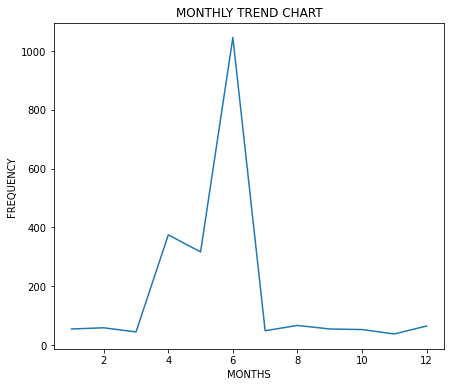

In [14]:
plt.figure(figsize=(7,6))
plt.plot(Month_wise_df["Months"],Month_wise_df["Frequency"])
plt.xlabel("MONTHS")
plt.ylabel("FREQUENCY")
plt.title("MONTHLY TREND CHART")
plt.show()

### INSIGHTS:- From the above trend chart, we can clearly see that complaints for the 6th month  are maximum

In [15]:
day_wise=df.Date_month_year.value_counts()
day_wise_df=pd.DataFrame(day_wise)
day_wise_df.rename(columns={"Date_month_year":"freq"},inplace= True )
day_wise_df["Date_month_year"]=day_wise_df.index
day_wise_df.reset_index(drop=True,inplace=True)
day_wise_df.sort_values("Date_month_year",inplace=True)
day_wise_df.head()

,freq,Date_month_year
43,18,2015-01-04
66,12,2015-01-05
25,25,2015-01-06
17,27,2015-02-04
85,7,2015-02-05


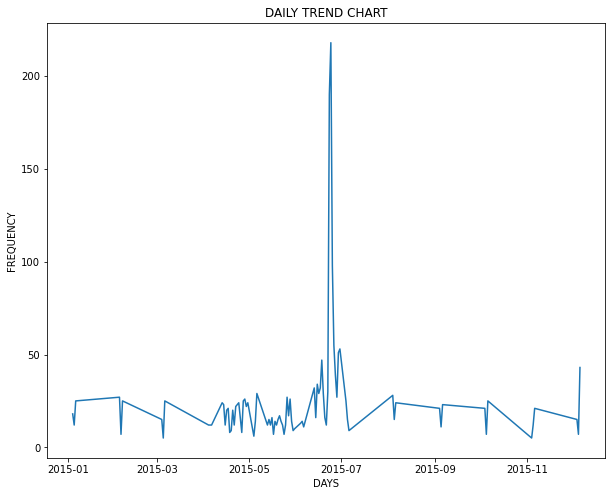

In [16]:
plt.figure(figsize=(10,8))
sns.lineplot(day_wise_df["Date_month_year"],day_wise_df["freq"])
plt.xlabel("DAYS")
plt.ylabel("FREQUENCY")
plt.title("DAILY TREND CHART")
plt.show()

### INSIGHTS:- From the above trend chart, we can clearly see that complaints for the 7th Day are maximum

### 2) Provide a table with the frequency of complaint types.
###      Which complaint types are maximum i.e., around internet, network issues, or across any other domains.


In [17]:
a = df['Customer Complaint'].value_counts()
complaint_types = pd.DataFrame(a)
complaint_types = complaint_types.rename(columns = {"Customer Complaint":"frequency"})
complaint_types["complaint_types"] = complaint_types.index
complaint_types.sort_values("frequency",ascending = False)
complaint_types.reset_index(drop=True,inplace= True)
complaint_types.head(10)


,frequency,complaint_types
0,83,Comcast
1,18,Comcast Internet
2,17,Comcast Data Cap
3,13,comcast
4,11,Comcast Billing
5,11,Data Caps
6,11,Comcast Data Caps
7,9,Unfair Billing Practices
8,8,Comcast internet
9,8,Comcast/Xfinity


### Comcast type are the highest number of complaints(83).

### 3)Create a new categorical variable with value as Open and Closed. Open & Pending is to be categorized as               Open and Closed & Solved is to be categorized as Closed.



In [18]:
df["new_status"]=df["Status"].replace({"Solved":"Closed","Pending":"Open"})
df.head(5)

,Customer Complaint,Date,Date_month_year,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,Month,day,new_status
0,Comcast Cable Internet Speeds,22-04-15,2015-04-22,Customer Care Call,Abingdon,Maryland,21009,Closed,No,4,22,Closed
1,Payment disappear - service got disconnected,04-08-15,2015-08-04,Internet,Acworth,Georgia,30102,Closed,No,8,4,Closed
2,Speed and Service,18-04-15,2015-04-18,Internet,Acworth,Georgia,30101,Closed,Yes,4,18,Closed
3,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,2015-07-05,Internet,Acworth,Georgia,30101,Open,Yes,7,5,Open
4,Comcast not working and no service to boot,26-05-15,2015-05-26,Internet,Acworth,Georgia,30101,Solved,No,5,26,Closed


### 4) Which state has the maximum complaints

In [19]:
df.groupby(["State"]).size().sort_values(ascending=False)

State
Georgia                 288
Florida                 240
California              220
Illinois                164
Tennessee               143
Pennsylvania            130
Michigan                115
Washington               98
Colorado                 80
Maryland                 78
New Jersey               75
Texas                    71
Massachusetts            61
Virginia                 60
Indiana                  59
Oregon                   49
Mississippi              39
Minnesota                33
Alabama                  26
Utah                     22
Arizona                  20
South Carolina           18
District Of Columbia     16
New Mexico               15
Louisiana                13
New Hampshire            12
Connecticut              12
Delaware                 12
West Virginia            11
Kentucky                  7
New York                  6
Arkansas                  6
Maine                     5
Missouri                  4
North Carolina            3
Vermont       

### INSIGHTS:- From the above table, we can clearly see that Georgia has maximum complaints

### 5) Provide state wise status of complaints in a stacked bar chart

In [20]:
Status_complaints = df.groupby(["State","new_status"]).size().unstack()
print(Status_complaints)

new_status            Closed  Open
State                             
Alabama                 17.0   9.0
Arizona                 14.0   6.0
Arkansas                 6.0   NaN
California             159.0  61.0
Colorado                58.0  22.0
Connecticut              9.0   3.0
Delaware                 8.0   4.0
District Of Columbia    14.0   2.0
District of Columbia     1.0   NaN
Florida                201.0  39.0
Georgia                208.0  80.0
Illinois               135.0  29.0
Indiana                 50.0   9.0
Iowa                     1.0   NaN
Kansas                   1.0   1.0
Kentucky                 4.0   3.0
Louisiana               12.0   1.0
Maine                    3.0   2.0
Maryland                63.0  15.0
Massachusetts           50.0  11.0
Michigan                92.0  23.0
Minnesota               29.0   4.0
Mississippi             23.0  16.0
Missouri                 3.0   1.0
Montana                  1.0   NaN
Nevada                   1.0   NaN
New Hampshire       

<AxesSubplot:xlabel='State'>

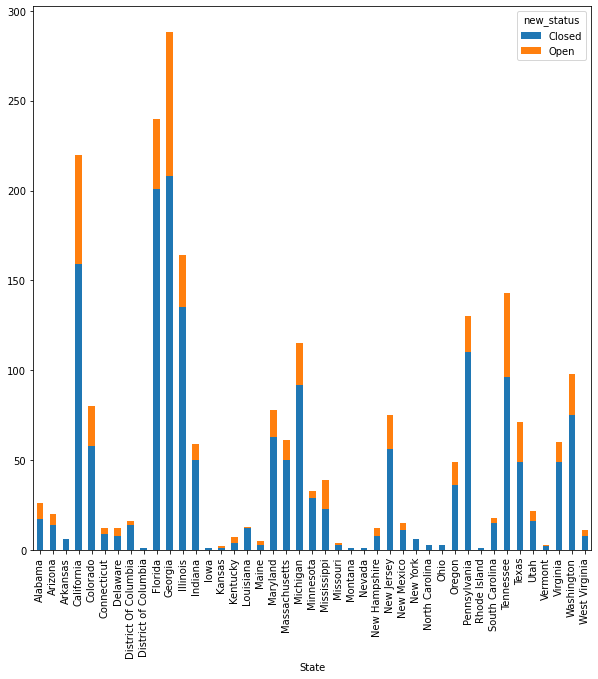

In [21]:
Status_complaints.plot.bar(figsize=(10,10),stacked=True)

### INSIGHTS:- From the above chart, we can clearly see that Georgia has maximum complaints.

 ### 6) State which has the highest percentage of unresolved complaints

In [22]:

unresolved_complaints=df[df.new_status=="Open"]
statelist=unresolved_complaints["State"].value_counts()

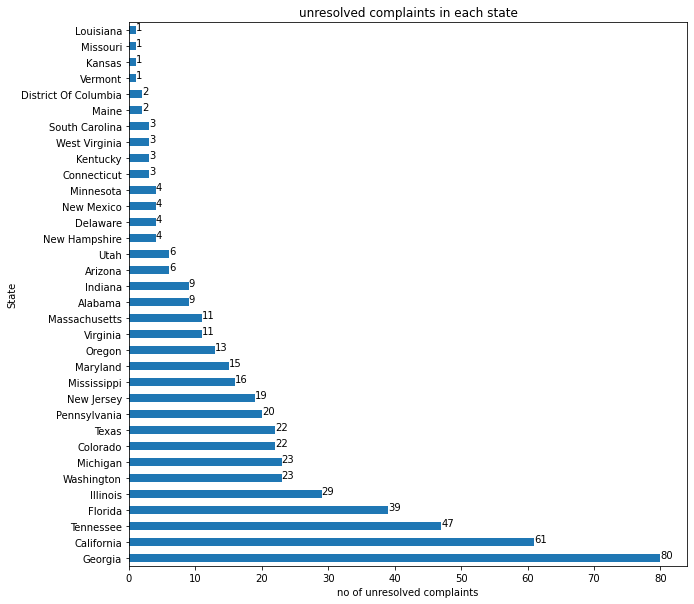

In [23]:
statelist.plot(kind="barh",figsize=(10,10))
plt.xlabel("no of unresolved complaints")
plt.ylabel("State")
plt.title("unresolved complaints in each state")
for index, value in enumerate(statelist):
    plt.text(value, index,
             str(value))
plt.show()


### Georgia has the highest number of unresolved complaints.

### 7) Provide the percentage of complaints resolved till date, which were received through the Internet and customer care calls.

In [24]:

x = df[df['new_status']=='Closed']
ccs = x['State'].value_counts()
cc = pd.DataFrame(ccs)
y = df[df["new_status"]=="Open"]
ocs= y['State'].value_counts()
oc = pd.DataFrame(ocs)

In [25]:
final= pd.concat([cc,oc],axis=1)
final.columns.values[0] = "open"
final.columns.values[1] = "close"
final["state"] = final.index
final.reset_index(drop=True,inplace= True)
final.head()

,open,close,state
0,208,80.0,Georgia
1,201,39.0,Florida
2,159,61.0,California
3,135,29.0,Illinois
4,110,20.0,Pennsylvania


In [26]:
resolved_data = df.groupby(['Received Via','new_status']).size().unstack().fillna(0)
resolved_data['resolved'] = resolved_data['Closed']/resolved_data['Closed'].sum()*100
resolved_data['resolved']

Received Via
Customer Care Call    50.615114
Internet              49.384886
Name: resolved, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

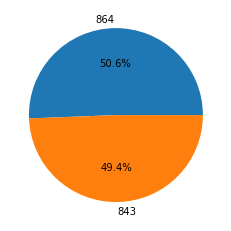

In [27]:
plt.pie(resolved_data["resolved"],labels = resolved_data['Closed'],radius= 1,autopct='%1.1f%%')
plt.show

### INSIGHTS:- From the above pie chart we can clearly see that there are total 50.61% Complaints resolved for Customer Care Call and 49.39% for received via internet.